In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [3]:
df = pd.read_csv("BitcoinPrice.csv")
df_norm = df.drop(['Timestamp'], 1, inplace=True)

<ipython-input-3-82061f9a85e9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_norm = df.drop(['Timestamp'], 1, inplace=True)


In [4]:
prediction_days = 30

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

In [5]:
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [6]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/100
67/67 [==============================] - 5s 7ms/step - loss: 0.0532
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 3/100
67/67 [==============================] - 0s 6ms/step - loss: 0.0456
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0434
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0414
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0394
Epoch 7/100
67/67 [==============================] - 0s 4ms/step - loss: 0.0374
Epoch 8/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 9/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0332
Epoch 10/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0313
Epoch 11/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 12/100
67/67 [==============================] - 0s 4ms/step - loss: 0.0273
Epoch 13/100
67/67 [=================

In [7]:
test_set = df_test.values

inputs = np.reshape(test_set, (len(test_set), 1))
inputs = min_max_scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

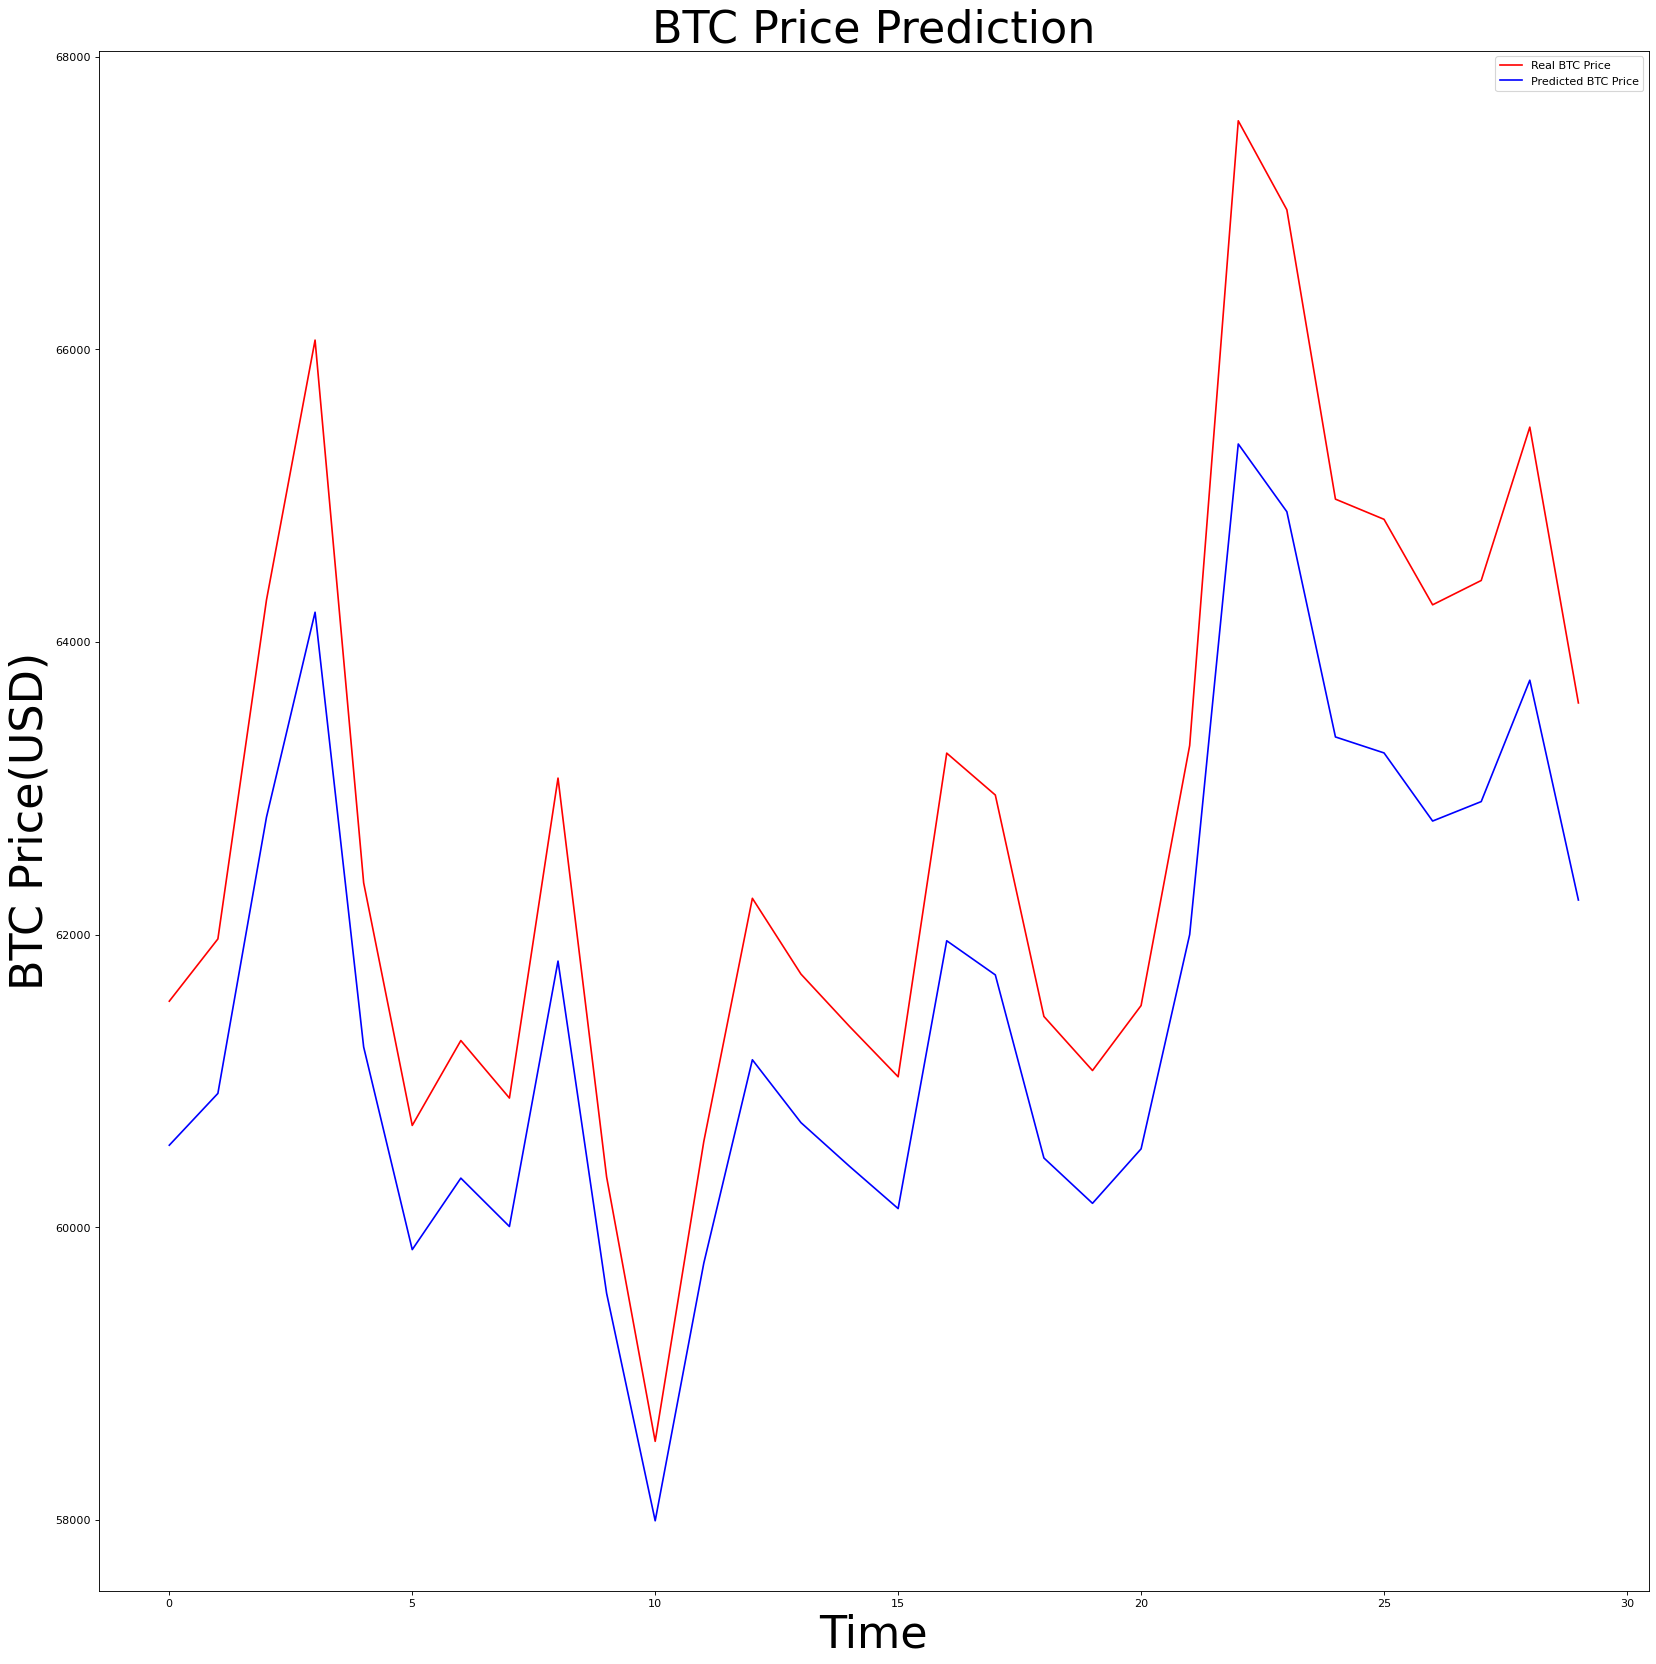

In [8]:
plt.figure(figsize=(25, 25), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()